In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import pandas_datareader as pdr

%matplotlib inline
import matplotlib.pyplot as plt

import math

#INTEL = pdr.get_data_yahoo('INTC')
#INTEL.to_csv('INTEL.csv')
INTEL = pd.read_csv('INTEL.csv',index_col='Date')
INTEL.index = pd.to_datetime(INTEL.index)

#NVIDIA = pdr.get_data_yahoo('NVDA')
#NVIDIA.to_csv('NVIDIA.csv')
NVIDIA = pd.read_csv('NVIDIA.csv',index_col='Date')
NVIDIA.index = pd.to_datetime(NVIDIA.index)

#AMD = pdr.get_data_yahoo('AMD')
#AMD.to_csv('AMD.csv')
AMD = pd.read_csv('AMD.csv',index_col='Date')
AMD.index = pd.to_datetime(AMD.index)

#TI = pdr.get_data_yahoo('TXN')
#TI.to_csv('TI.csv')
TI = pd.read_csv('TI.csv',index_col='Date')
TI.index = pd.to_datetime(TI.index)

#CYPRESS = pdr.get_data_yahoo('CY')
#CYPRESS.to_csv('CYPRESS.csv')
CYPRESS = pd.read_csv('CYPRESS.csv',index_col='Date')
CYPRESS.index = pd.to_datetime(CYPRESS.index)

#QUALCOMM = pdr.get_data_yahoo('QCOM')
#QUALCOMM.to_csv('QUALCOMM.csv')
QUALCOMM = pd.read_csv('QUALCOMM.csv',index_col='Date')
QUALCOMM.index = pd.to_datetime(QUALCOMM.index)


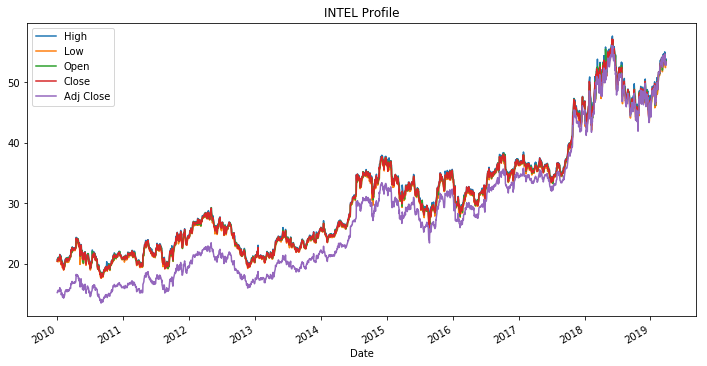

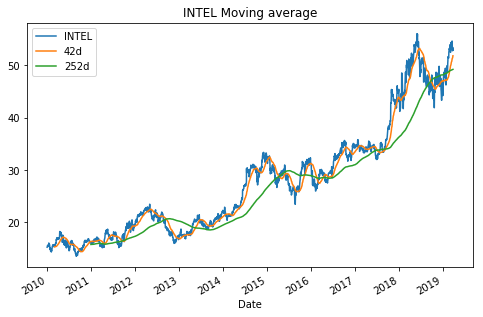

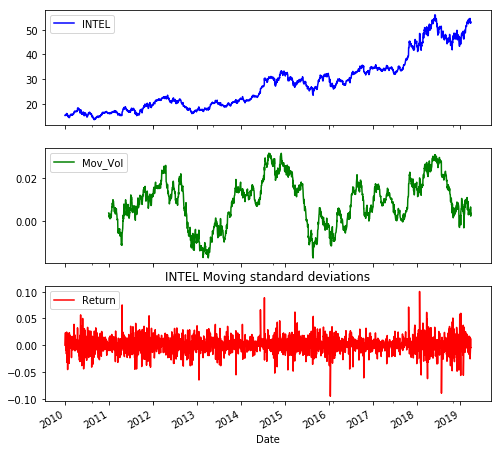

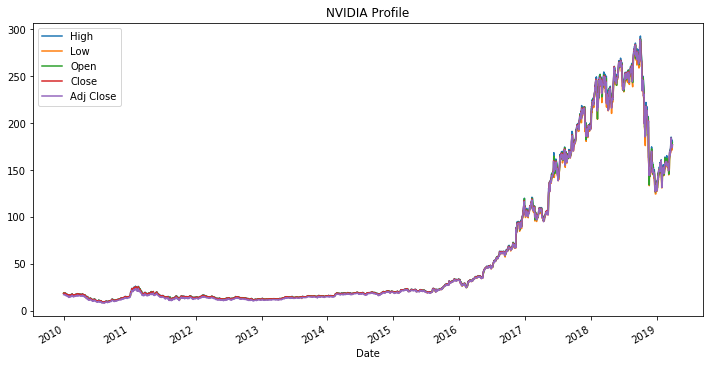

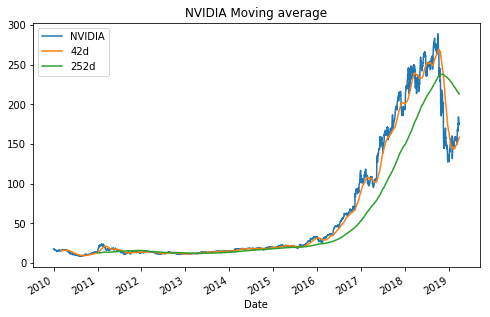

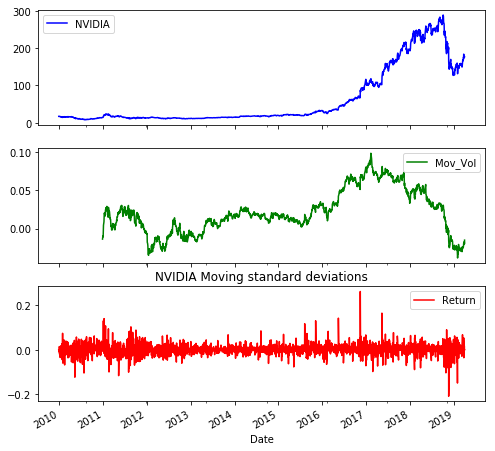

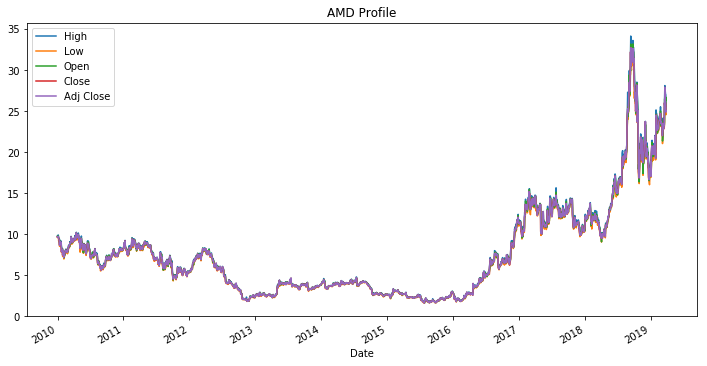

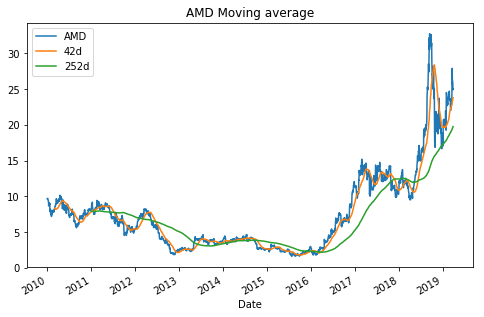

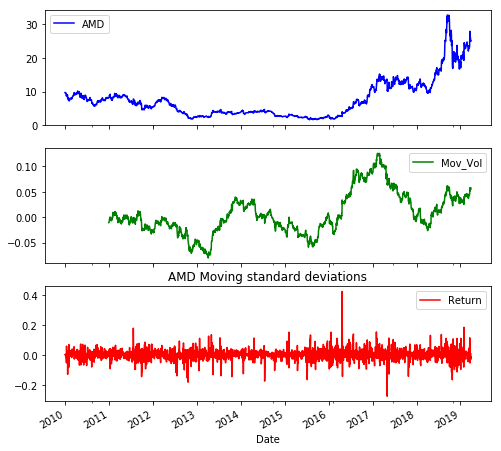

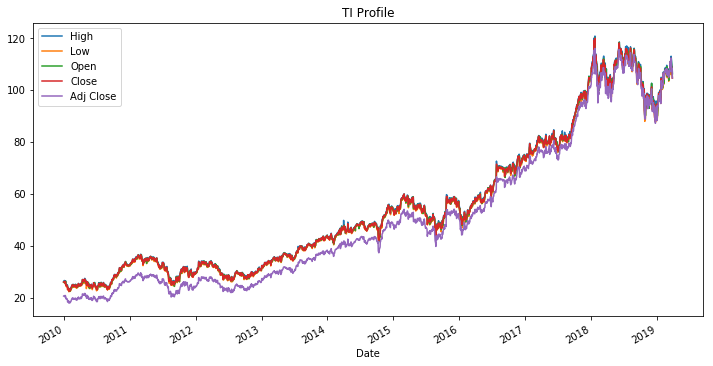

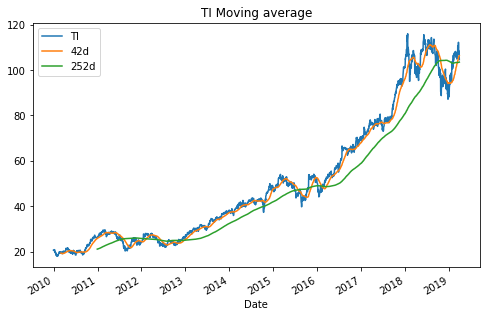

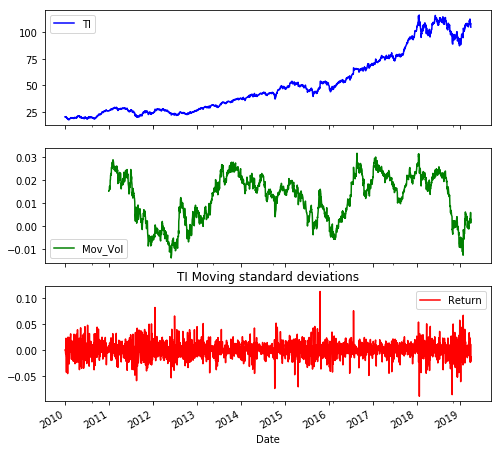

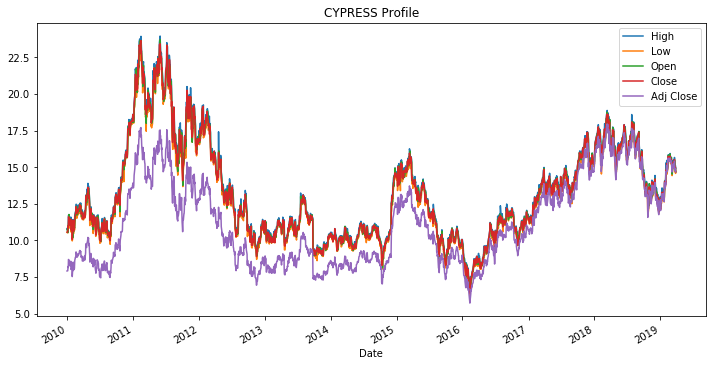

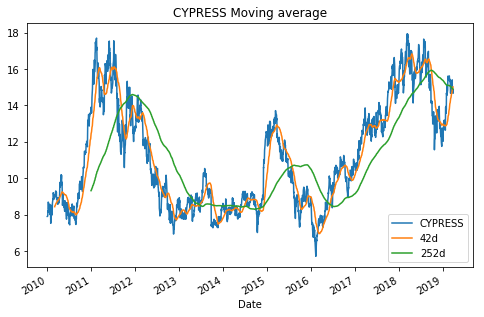

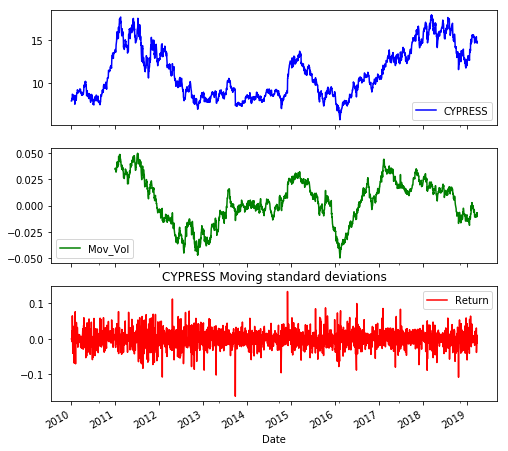

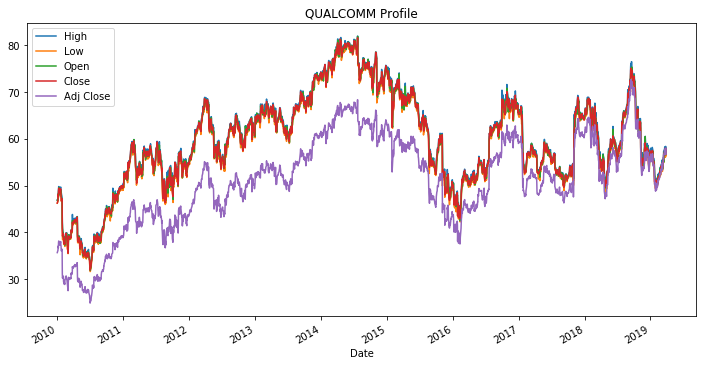

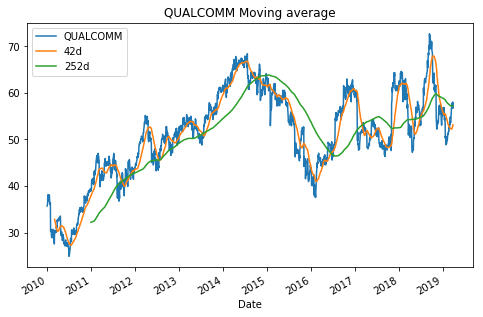

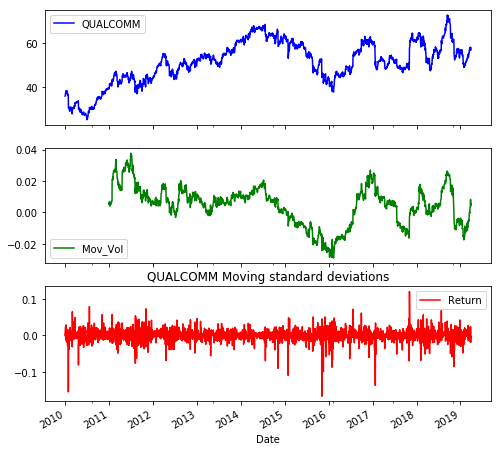

In [6]:
SemiCond_list = [INTEL,NVIDIA,AMD,TI,CYPRESS,QUALCOMM]
SemiCond_name = ['INTEL','NVIDIA','AMD','TI','CYPRESS','QUALCOMM']
for j in  range (6):
    #概览股价
    plt.rc('figure',figsize=(12,6))  
    SemiCond_list[j][['High','Low','Open','Close','Adj Close']].plot.line()
    plt.title(SemiCond_name[j]+' Profile')
    plt.savefig(SemiCond_name[j]+"Basic Chart.png")
    
    #波动率变化
    df = pd.DataFrame(SemiCond_list[j]['Adj Close'])
    df.columns = [SemiCond_name[j]]
    df['Return'] = 0.0
    for i in range(1,len(df)):
        df['Return'][i] = np.log(df[SemiCond_name[j]][i] / df[SemiCond_name[j]][i-1])
    
    #移动平均值
    df['42d'] = df[SemiCond_name[j]].rolling(window=42,center=False).mean()
    df['252d'] = df[SemiCond_name[j]].rolling(window=252,center=False).mean()
    df[[SemiCond_name[j],'42d','252d']].plot(figsize=(8,5))
    plt.title(SemiCond_name[j]+' Moving average')
    plt.savefig(SemiCond_name[j]+"Moving average.png")
    
    #移动历时标准差
    df['Mov_Vol'] = df['Return'].rolling(window=252,center=False).mean() * math.sqrt(252)
    df[[SemiCond_name[j],'Mov_Vol','Return']].plot(subplots=True,style=['b','g','r'],figsize=(8,8))
    plt.title(SemiCond_name[j]+' Moving standard deviations')
    plt.savefig(SemiCond_name[j]+"Moving standard deviations")
    
    SemiCond_describe = SemiCond_list[j].describe()
    SemiCond_describe.to_csv(SemiCond_name[j]+" describe.csv")


In [3]:
AC = pd.DataFrame(INTEL['Adj Close'])
AC.columns = ['INTEL']
AC['NVIDIA'] = NVIDIA['Adj Close']
AC['AMD'] = AMD['Adj Close']
AC['TI'] = TI['Adj Close']
AC['CYPRESS'] = CYPRESS['Adj Close']
AC['QUALCOMM'] = QUALCOMM['Adj Close']
#AC.to_csv("Adj collect.csv")


In [4]:
ACC = AC.corr()
ACC.to_csv("Adj corr.csv")
AC.corr()

,INTEL,NVIDIA,AMD,TI,CYPRESS,QUALCOMM
INTEL,1.000000,0.881418,0.647525,0.970540,0.516608,0.513024
NVIDIA,0.881418,1.000000,0.794118,0.933847,0.648090,0.343126
AMD,0.647525,0.794118,1.000000,0.701710,0.631079,0.109711
TI,0.970540,0.933847,0.701710,1.000000,0.558409,0.491427
CYPRESS,0.516608,0.648090,0.631079,0.558409,1.000000,0.116539
QUALCOMM,0.513024,0.343126,0.109711,0.491427,0.116539,1.000000


In [5]:
ACD = AC.describe()
ACD.to_csv("Adj describe.csv")
AC.describe()

,INTEL,NVIDIA,AMD,TI,CYPRESS,QUALCOMM
count,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000,2325.000000
mean,27.672830,61.141761,7.551316,50.130993,11.157511,51.011274
std,10.742476,76.889136,5.682201,28.015929,2.923049,9.658931
min,13.512651,8.201909,1.620000,17.906107,5.714463,24.894133
25%,18.494482,13.599262,3.460000,26.560305,8.588177,45.126709
50%,26.297171,18.650059,6.180000,42.303600,10.380337,51.709267
75%,33.389065,92.534279,9.720000,68.494423,13.382701,58.716728
max,56.025032,288.773132,32.720001,115.969833,17.938669,72.641121


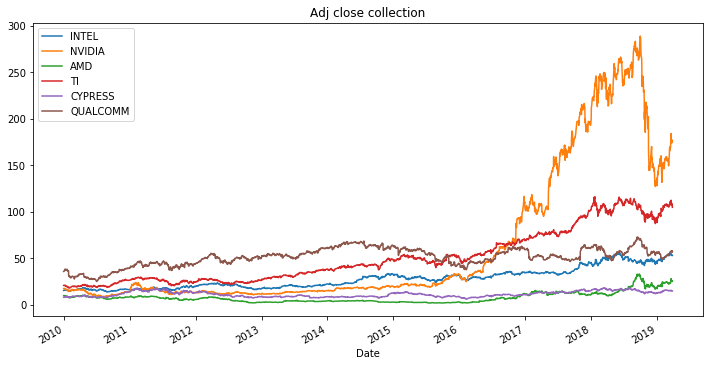

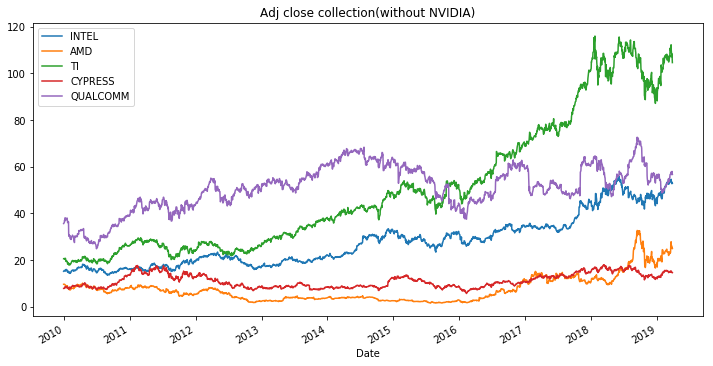

In [4]:
plt.rc('figure',figsize=(12,6))
AC[['INTEL','NVIDIA','AMD','TI','CYPRESS','QUALCOMM']].plot.line()
plt.title("Adj close collection")
plt.savefig("Adj close collection")
plt.rc('figure',figsize=(12,6))
AC[['INTEL','AMD','TI','CYPRESS','QUALCOMM']].plot.line()
plt.title("Adj close collection(without NVIDIA)")
plt.savefig("Adj close collection(without NVIDIA)")